In [1]:
# library

from matplotlib_venn import venn2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
x_test = np.load('/home/jongli/Dropbox/project/NBM/test_x.npy')
y_test = np.load('/home/jongli/Dropbox/project/NBM/test_y.npy')
x_test.shape, y_test.shape

((145, 4), (145, 5))

In [4]:
filename1 = './model/smote_knn.sav'
filename2 = './model/smote_rf.sav'
filename3 = './model/smote_svm.sav'

In [5]:
knn = pickle.load(open(filename1, 'rb'))
rf = pickle.load(open(filename2, 'rb'))
svm = pickle.load(open(filename3, 'rb'))

In [13]:
knn_pred = knn.predict(x_test)
rf_pred = rf.predict(x_test)
svm_pred = svm.predict(x_test)
print(knn_pred.shape, rf_pred.shape, svm_pred.shape)


#svm_train = accuracy_score(y_train.argmax(axis = 1), svm_clf.predict(x_train))
svm_test = accuracy_score(y_test.argmax(axis = 1), svm_pred)
print(svm_test)


#svm_train = accuracy_score(y_train.argmax(axis = 1), svm_clf.predict(x_train))
knn_test = accuracy_score(y_test.argmax(axis = 1), knn_pred)
print(knn_test)

#svm_train = accuracy_score(y_train.argmax(axis = 1), svm_clf.predict(x_train))
rf_test = accuracy_score(y_test.argmax(axis = 1), rf_pred)
print(rf_test)

0.7655172413793103

In [14]:
knn_pred = knn_pred.argmax(axis = 1)
rf_pred = rf_pred.argmax(axis = 1)
knn_pred.shape, rf_pred.shape

y_test = y_test.argmax(axis = 1)
y_test.shape

(145,)

In [15]:
knn_pred.shape, rf_pred.shape, svm_pred.shape, y_test.shape

((145,), (145,), (145,), (145,))

In [16]:
print(knn_pred[:10])
print(rf_pred[:10])
print(svm_pred[:10])
print(y_test[:10])

[3 3 2 0 3 3 1 1 2 1]
[2 3 1 0 2 3 0 1 1 2]
[2 3 1 0 2 0 2 1 1 2]
[2 2 1 2 2 2 2 2 1 2]


In [19]:
knn_str = []
rf_str = []
svm_str = []


for i in range(len(knn_pred)):
    if y_test[i] != knn_pred[i]:
        knn_str.append("False")
    else:
        knn_str.append("True")
    
len(knn_str)

for i in range(len(rf_pred)):
    if y_test[i] != rf_pred[i]:
        rf_str.append("False")
    else:
        rf_str.append("True")
    
len(rf_str)

for i in range(len(svm_pred)):
    if y_test[i] != svm_pred[i]:
        svm_str.append("False")
    else:
        svm_str.append("True")
    
len(svm_str)

145

In [21]:
import pandas as pd
df = pd.DataFrame(columns= ['Ground truth_smote', 'knn_smote', 'rf_smote', 'svm_smote'])

In [22]:
df['knn_smote'] = knn_str
df['rf_smote'] = rf_str
df['svm_smote'] = svm_str
df.head(15)

,Ground truth_smote,knn_smote,rf_smote,svm_smote
0,NaN,False,True,True
1,NaN,False,False,False
2,NaN,False,True,True
3,NaN,False,False,False
4,NaN,False,True,True
5,NaN,False,False,False
6,NaN,False,False,True
7,NaN,False,False,False
8,NaN,False,True,True
9,NaN,False,True,True


In [23]:
cat_str = []
for i in range(len(y_test)):
    if y_test[i] == 0:
        cat_str.append('Gang Rape')
    elif y_test[i] == 1:
        cat_str.append('Kidnap')
    elif y_test[i] == 2:
        cat_str.append('Murder')
    elif y_test[i] == 3:
        cat_str.append('Robbery')
    elif y_test[i] == 4:
        cat_str.append('Violence Against Women')
        
len(cat_str)
    

145

In [24]:
print(cat_str[:15])
print(y_test[:15])

['Murder', 'Murder', 'Kidnap', 'Murder', 'Murder', 'Murder', 'Murder', 'Murder', 'Kidnap', 'Murder', 'Gang Rape', 'Murder', 'Robbery', 'Murder', 'Murder']
[2 2 1 2 2 2 2 2 1 2 0 2 3 2 2]


In [27]:
df['Ground truth_smote'] = cat_str

In [28]:
df.head()

,Ground truth_smote,knn_smote,rf_smote,svm_smote,Ground truth
0,Murder,False,True,True,Murder
1,Murder,False,False,False,Murder
2,Kidnap,False,True,True,Kidnap
3,Murder,False,False,False,Murder
4,Murder,False,True,True,Murder


In [30]:
df = df.drop(df.columns[[4]], axis = 1)
df.head()

,Ground truth_smote,knn_smote,rf_smote,svm_smote
0,Murder,False,True,True
1,Murder,False,False,False
2,Kidnap,False,True,True
3,Murder,False,False,False
4,Murder,False,True,True


In [31]:
df.to_csv('smote_data.csv')

In [32]:
df.head()

,Ground truth_smote,knn_smote,rf_smote,svm_smote
0,Murder,False,True,True
1,Murder,False,False,False
2,Kidnap,False,True,True
3,Murder,False,False,False
4,Murder,False,True,True


In [33]:
df2 = pd.read_csv('smote_data.csv')
df2.head()

,Index,Ground truth_smote,knn_smote,rf_smote,svm_smote
0,0,Murder,False,True,True
1,1,Murder,False,False,False
2,2,Kidnap,False,True,True
3,3,Murder,False,False,False
4,4,Murder,False,True,True


In [53]:
list1_true = []
list1_false = []

In [54]:
for x, y in zip(df2['Index'], df2['svm_smote']):
    if y is True:
        list1_true.append(x)
    else:
        list1_false.append(x)
len(list1_true),len(list1_false)

(115, 30)

In [51]:
type(df['svm_smote'])

pandas.core.series.Series

In [52]:
len(list_true),len(list_false)

(345, 235)

In [55]:
list1_true[:10]

[0, 2, 4, 6, 8, 9, 10, 12, 14, 15]

In [56]:
with open("svm_smote.txt", "wb") as fp:
    pickle.dump(list1_true, fp)

In [57]:
with open("svm_smote.txt", "rb") as fp:   # Unpickling
    l = pickle.load(fp)

In [58]:
l[:10]

[0, 2, 4, 6, 8, 9, 10, 12, 14, 15]

In [59]:
df_3 = pd.read_csv('/home/jongli/Dropbox/project/NBM/Raw_data/raw_data.csv')
df_3.head()

,Index,Ground truth,knn,rf,svm
0,0,Murder,True,True,True
1,1,Murder,True,True,True
2,2,Kidnap,False,False,False
3,3,Murder,True,True,True
4,4,Murder,True,True,True


In [60]:
list_raw_true = []
list_raw_false = []

In [62]:
for x, y in zip(df_3['Index'], df_3['svm']):
    if y is True:
        list_raw_true.append(x)
    else:
        list_raw_false.append(x)
len(list_raw_true),len(list_raw_false)

(98, 47)

In [63]:
len(l), len(list_raw_true)

(115, 98)

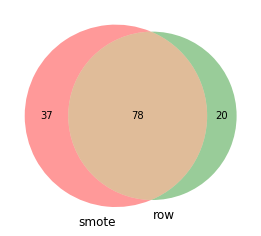

In [69]:
venn2([set(l), set(list_raw_true)], set_labels = ('smote', 'row'))
plt.savefig('test.png')
plt.show()